In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

DATA_PATH = "/home/pp/Documents/DSP/Databank/Data/Simulations/"
datapoints = {}

for root, dirs, files in os.walk(DATA_PATH):
    if 'FormFactor.json' in files:
        simul_id = root[len(DATA_PATH):]
        
        f = open(root + '/FormFactor.json')
        data = json.load(f)
        form_factor = pd.DataFrame(data)[1]
        
        if 'thickness.json' in files:
            f = open(root + '/thickness.json')
            thickness = json.load(f)
        else:
            thickness = np.nan
            
        if 'apl.json' in files:
            f = open(root + '/apl.json')
            data = json.load(f)
            
            value_mean = np.mean(list(data.values()))
            
            if np.isnan(value_mean):
                apl = np.nan
                apl_len = np.nan
            else:
                apl = value_mean
                apl_len = len(list(data.values()))
        else:
            apl = np.nan
            apl_len = np.nan
            
        if 'TotalDensity.json' in files:
            f = open(root + '/TotalDensity.json')
            data = json.load(f)
            
            total_density = pd.DataFrame(data)
            total_density_len = total_density.shape[0]
        else:
            total_density = np.nan
            total_density_len = np.nan
            
        result = {
            'form_factor': form_factor,
            'thickness': thickness,
            'apl': apl,
            'apl_len': apl_len,
            'total_density': total_density,
            'total_density_len': total_density_len
        }
        
        datapoints[simul_id] = result

/home/pp/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


14d/087/14d0877ce72d8efb3ca98991ab5bd444eff16050/a1f214040627f0ddcdb1913c0c6cc2fc86dab961


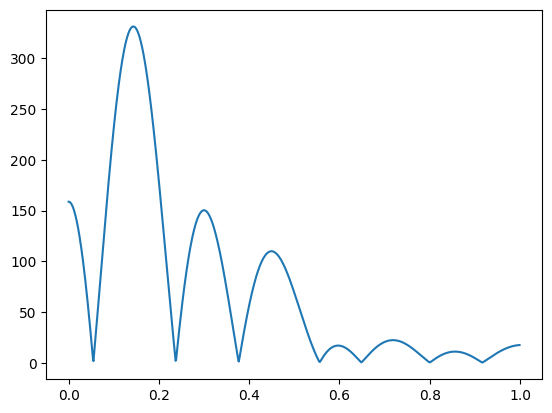

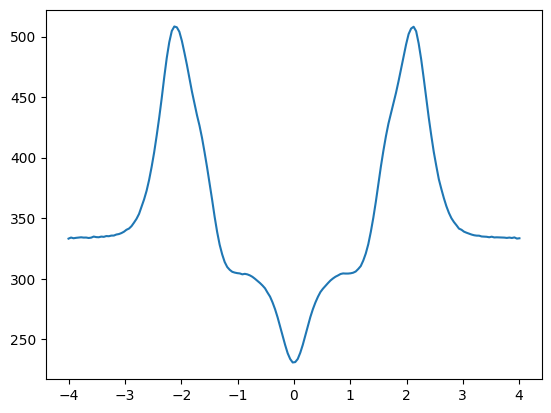

4.566351333618163
58.64532182541571

--------

14d/c9d/14dc9def4bb06d082a836c65deaf77a79a476edc/14dc9def4bb06d082a836c65deaf77a79a476edc


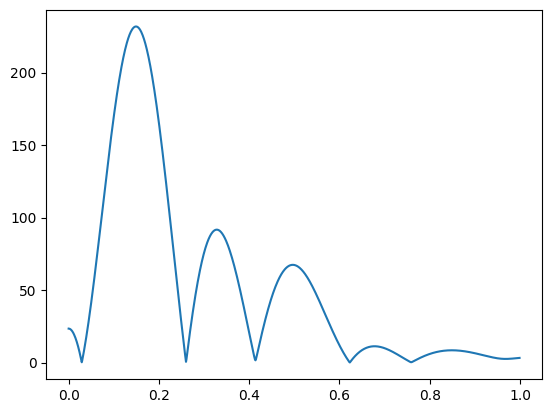

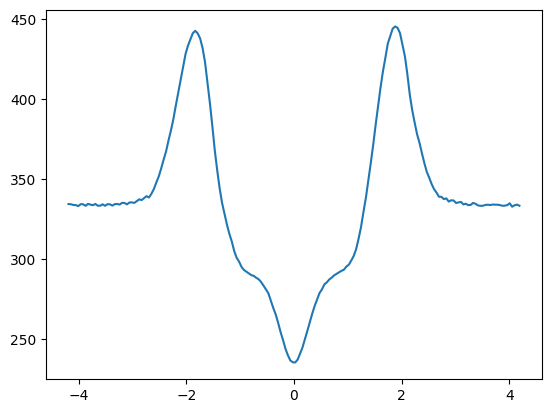

4.256051307678224
61.68405121589232

--------

8ca/000/8ca00036c7b2651777029af5432ab0dbdd369e55/ddda204aa8857c2b9193e9eed192359ede29420f


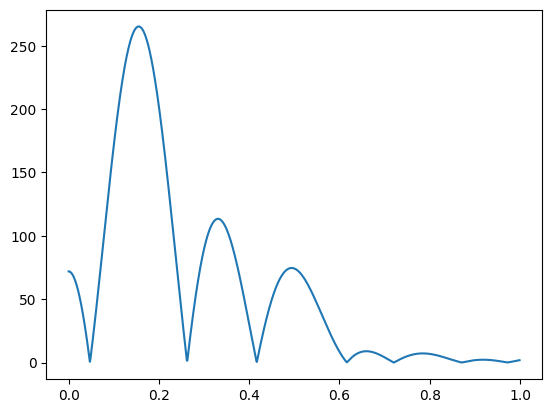

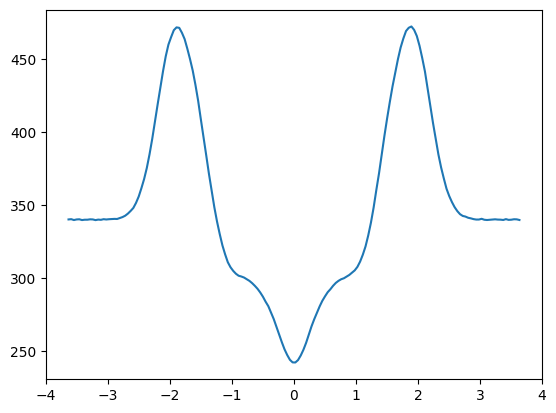

4.182794677734376
61.79643414171107

--------

9a7/003/9a700315b567dea72fe8509c0d33481ba2a49075/a4e20018c3970fd47f3fb93ac5be709892261c09


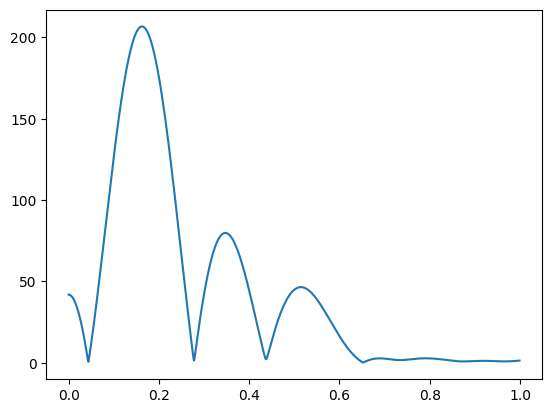

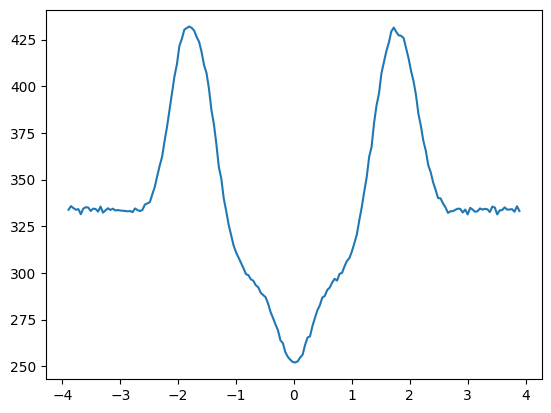

4.043857154846192
66.10179314493843

--------

118/63c/11863cc69a9981c131cf84c5c0a9b0e121d4fd82/7460bf1dfb99b7838374837e35ccca3c416a7659


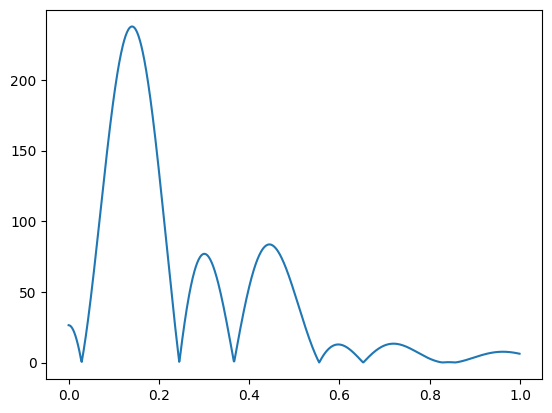

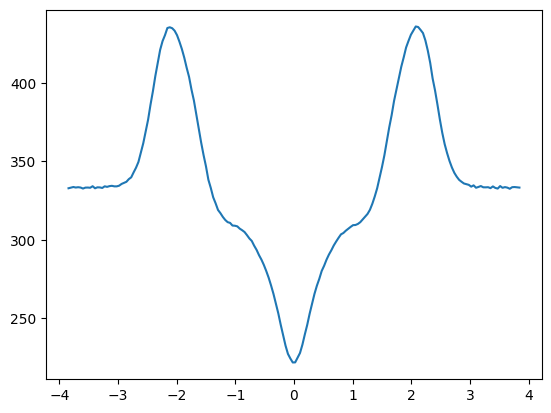

4.604599914550781
52.94517384335633

--------

1ef/206/1ef20600128744e801bca89047de22964acd3e9d/edbe8c7309de6bdb695c6fc59615b8c5488ab91b


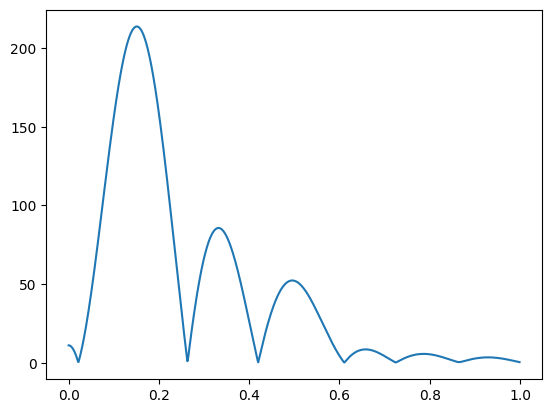

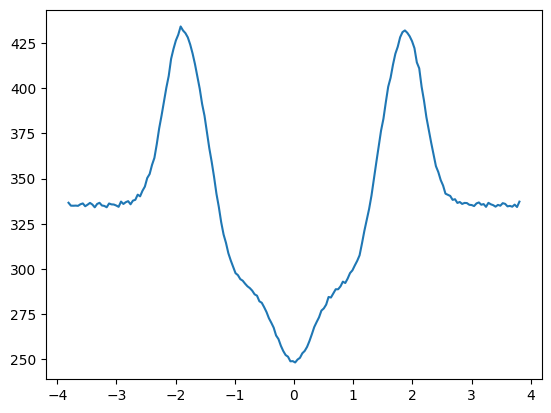

4.111844261169434
68.14028304916519

--------

808/c7a/808c7aeb6d972c46e68b73262779414b4dad7295/5f945ed9d7f9e2cd38133fec4afb757eb7db3542


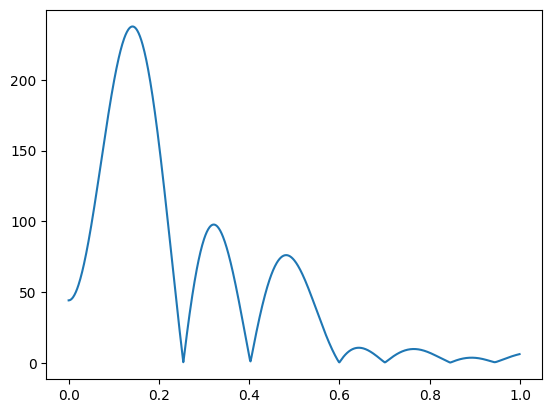

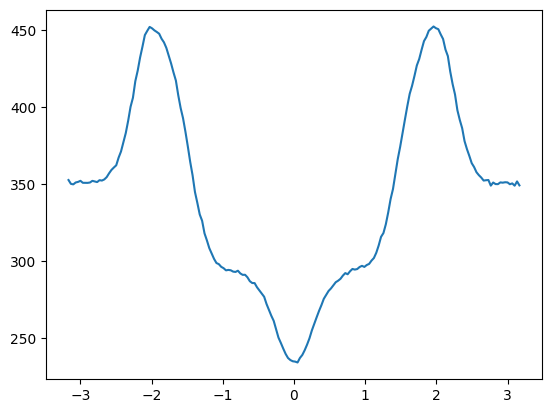

4.4212079315185555
61.59007847808604

--------

95c/736/95c7369066c86ec65669e86bf250814c3bdb6033/0f4d4825670af2e814557030787f14a3f376d6ea


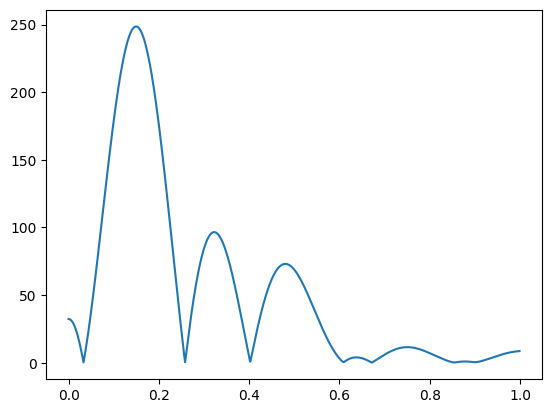

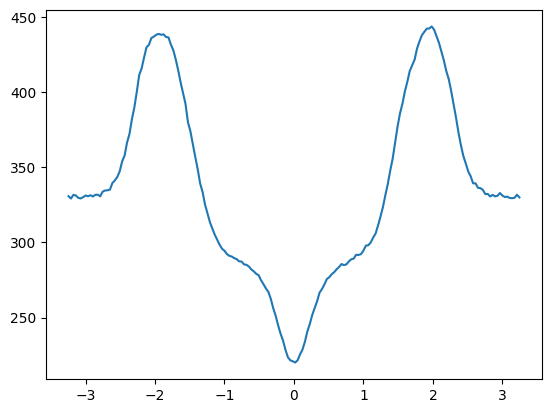

4.385442733764648
60.23740807800897

--------

978/ed7/978ed7ba7a6f4f1119b598f6d1084552fe34542f/fa3e0e4992a9099a0e3262451f820180f3f8b9d4


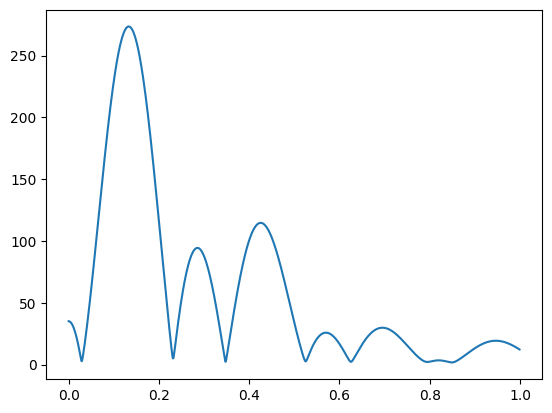

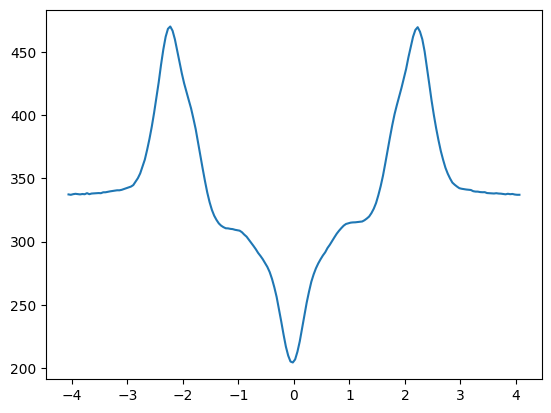

4.9167001266479495
49.431515969514024

--------

cf1/3f5/cf13f50e4136d05074843ec1e2d92311a6caec5f/e6988d53abcfd89b5bfff6b523d43ea4ff9791a1


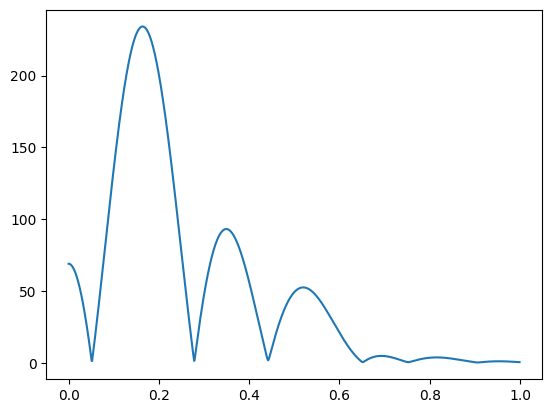

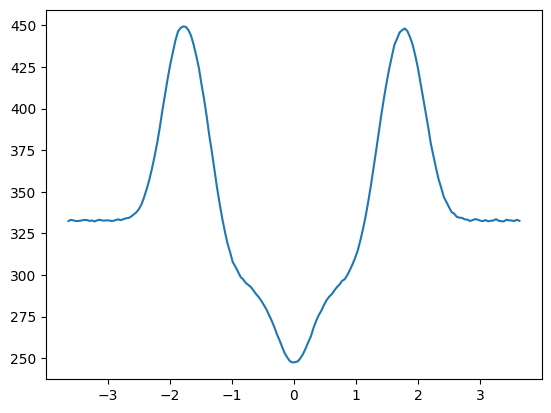

3.948610305786133
66.85126972694397

--------



In [104]:
# Example plotting

for d in list(datapoints.keys())[:10]:
    print(d)
    #xs = datapoints[d]['form_factor'][0]
    xs = np.arange(0, 1, 0.001)
    ys = datapoints[d]['form_factor']
    plt.plot(xs, ys)
    plt.show()
    
    #print(datapoints[d]['total_density'])
    xs2 = datapoints[d]['total_density'][0]
    ys2 = datapoints[d]['total_density'][1]
    plt.plot(xs2, ys2)
    plt.show()
    print(datapoints[d]['thickness'])
    print(datapoints[d]['apl'])
    print("\n--------\n")

0.042890228607634945
0.11445720468108188
0.00023273384854677134
0.0005930425113038901
112969
5.423192122328374e-05


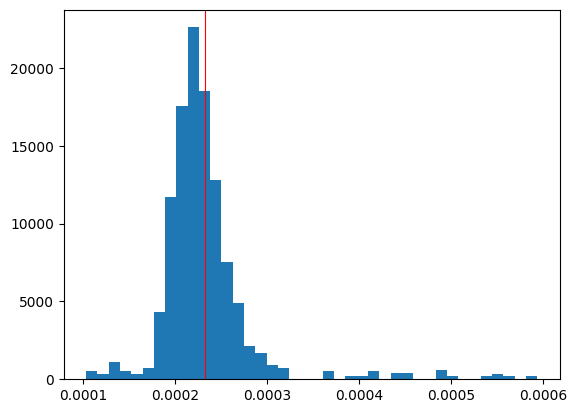

In [175]:
avgs = []
diffs = []

for (k, v) in datapoints.items():
    if not isinstance(v['total_density'], float):
        cmax = np.max(v['total_density'][0])
        cmin = np.min(v['total_density'][0])
        n = len(v['total_density'][0])
        avg = (abs(cmax) + abs(cmin)) / n
        avgs.append(avg)
        
        a = v['total_density'][0][0]

        
        for j in v['total_density'][0][1:]:
            diff = abs(j-a)
            diffs.append(abs(diff - avg))
            a = j

print(np.mean(avgs))
print(max(avgs))
print(np.mean(diffs))
print(max(diffs))

print(len(diffs))
print(np.std(diffs))

plt.hist(diffs, bins=40)
plt.axvline(np.mean(diffs), color="r", linewidth=0.8)
plt.show()


In [93]:
train_n = round(0.8 * len(datapoints))
test_n = len(datapoints) - train_n

keys = list(datapoints.keys())
train_keys = np.random.choice(keys, train_n, replace=False)
test_keys = [k for k in keys if k not in train_keys]

In [215]:
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPRegressor

thickness_train_xs = []
thickness_train_ys = []

for tk in train_keys:
    if not np.isnan(datapoints[tk]['thickness']):
        thickness_train_xs.append(datapoints[tk]['form_factor'])
        thickness_train_ys.append(datapoints[tk]['thickness'])

xs = np.array(normalize(thickness_train_xs, norm='max', axis=1))
#xs = np.array(thickness_train_xs)
ys = np.array(thickness_train_ys)

print(len(xs))

#plt.plot(np.arange(0, 1, 0.001), xs[8])
#plt.show()


model = MLPRegressor(hidden_layer_sizes=(16, 10), max_iter=500).fit(xs, ys)

568


In [217]:
thickness_test_xs = []
thickness_test_ys = []

for tk in test_keys:
    if not np.isnan(datapoints[tk]['thickness']):
        thickness_test_xs.append(datapoints[tk]['form_factor'])
        thickness_test_ys.append(datapoints[tk]['thickness'])

xs = np.array(normalize(thickness_test_xs, norm='max', axis=1))
#xs = np.array(thickness_train_xs)
ys = np.array(thickness_test_ys)

print(len(xs))
        
model.score(xs, ys)

143


0.5643330560900048

In [ ]:
print()